## KNN Algorithum


## Importing Library

In [ ]:
import sklearn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset -- Iris dataset

In [ ]:
data=pd.read_csv('/content/Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Model Training


In [ ]:
features=data.iloc[:,:-1]
target=data.iloc[:,-1]
train_feature,test_feture,train_target,test_target=train_test_split(features,target,test_size=0.2)
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(train_feature,train_target)

KNeighborsClassifier(n_neighbors=3)

## Predicting Data

In [ ]:
pred_target=knn.predict(test_feture)
print(accuracy_score(test_target,pred_target))
con_matrix=confusion_matrix(test_target,pred_target)
print(confusion_matrix(test_target,pred_target))
print(classification_report(test_target,pred_target))

0.9666666666666667
[[15  0  0]
 [ 0  8  1]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.96      0.95        30
   weighted avg       0.97      0.97      0.97        30



## Calculating K value and model training

In [ ]:
for i in range(1,40):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(train_feature,train_target)
  pred_target=knn.predict(test_feture)
  print("accuracy",accuracy_score(test_target,pred_target))
  print("confusion_matrix",confusion_matrix(test_target,pred_target))
  print(classification_report(test_target,pred_target))
  error=np.mean(pred_target!=test_target)

1.0
[[15  0  0]
 [ 0  9  0]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

1.0
[[15  0  0]
 [ 0  9  0]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

1.0
[[15  0  0]
 [ 0  9  0]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa

## Graphical representation of error and k value

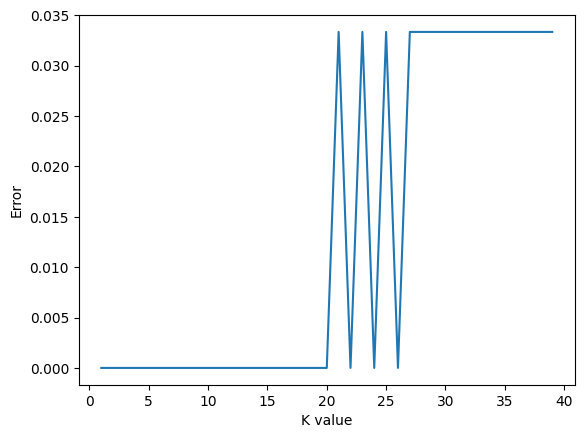

In [ ]:
plt.plot(range(1,40),error)
plt.xlabel('K value')
plt.ylabel('Error')
plt.show()

##Graphical reprsentation of confusion matrix

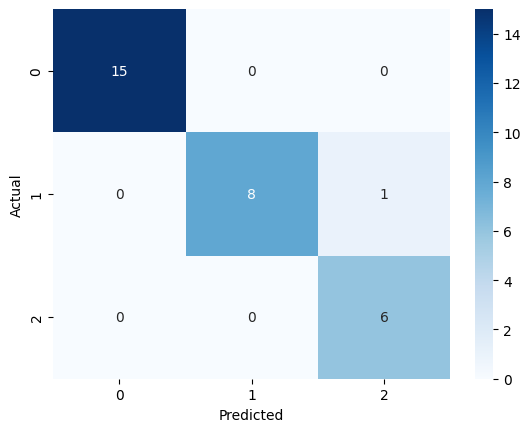

In [ ]:
sns.heatmap(con_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()